Based on https://github.com/yaringal/BayesianRNN/blob/master/Example/sentiment_lstm_regression.py

In [1]:
import numpy as np
from tensorflow.contrib.keras.python.keras.optimizers import SGD, RMSprop, Adagrad
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers.core import Dense, Dropout
from tensorflow.contrib.keras.python.keras.layers.embeddings import Embedding
from tensorflow.contrib.keras.python.keras.layers.recurrent import LSTM, GRU, SimpleRNN
from tensorflow.contrib.keras.python.keras.regularizers import l2
from tensorflow.contrib.keras.python.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from yaringal_callbacks import ModelTest
from yaringal_dataset import loader

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 5)

# Global params:
NB_WORDS = 20000
SKIP_TOP = 0
TEST_SPLIT = 0.2
INIT_SEED = 2017
GLOBAL_SEED = 2018
MAXLEN = 200
BATCH_SIZE = 128
TEST_BATCH_SIZE = 512

In [2]:
dataset = loader(INIT_SEED, MAXLEN, NB_WORDS, SKIP_TOP, TEST_SPLIT)

X_train, X_test, Y_train, Y_test = dataset.X_train, dataset.X_test, dataset.Y_train, dataset.Y_test
mean_y_train, std_y_train = dataset.mean_y_train, dataset.std_y_train

10620 train sequences
2655 test sequences
Pad sequences (samples x time)
X_train shape: (10620, 200)
X_test shape: (2655, 200)


In [3]:
def get_model(idrop=0.2, edrop=0.1, odrop=0.25, rdrop=0.2, weight_decay=1e-4, lr=1e-3):
    model = Sequential()
    model.add(Embedding(NB_WORDS, 128, embeddings_regularizer=l2(weight_decay),
                        input_length=MAXLEN)) 
    if edrop:
        model.add(Dropout(edrop))
    model.add(LSTM(128, kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                   bias_regularizer=l2(weight_decay), dropout=idrop, recurrent_dropout=rdrop))
    if odrop:
        model.add(Dropout(odrop))
    model.add(Dense(1, kernel_regularizer=l2(weight_decay),
                    bias_regularizer=l2(weight_decay)))
    optimizer = Adam(lr)
    model.compile(loss='mse', metrics=["mse"], optimizer=optimizer)
    return model

## Normal Variational LSTM (w/o Embedding Dropout)

In [4]:
print('Build model...')
model = get_model(rdrop=0.25, odrop=0.25, edrop=0, idrop=0.25, weight_decay=1e-4, lr=1e-3)

Build model...


In [5]:
modeltest_1 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=1, verbose=0, T=4,
                        mean_y_train=mean_y_train, std_y_train=std_y_train,
                        loss='euclidean', batch_size=TEST_BATCH_SIZE)

In [6]:
hisotry_1 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=250, callbacks=[modeltest_1])

Epoch 1/250
Standard error at epoch 000: 1.0075/0.1860
MC error at epoch 000: 1.0086/0.1861
13s - loss: 76.7415 - mean_squared_error: 1.0335
Epoch 2/250
Standard error at epoch 001: 1.0092/0.1861
MC error at epoch 001: 1.0137/0.1865
13s - loss: 59.6769 - mean_squared_error: 1.0054
Epoch 3/250
Standard error at epoch 002: 1.0045/0.1857
MC error at epoch 002: 1.0060/0.1858
13s - loss: 46.2585 - mean_squared_error: 1.0008
Epoch 4/250
Standard error at epoch 003: 1.0087/0.1861
MC error at epoch 003: 1.0094/0.1862
13s - loss: 35.6929 - mean_squared_error: 1.0034
Epoch 5/250
Standard error at epoch 004: 1.0078/0.1860
MC error at epoch 004: 1.0087/0.1861
13s - loss: 27.3884 - mean_squared_error: 0.9977
Epoch 6/250
Standard error at epoch 005: 1.0010/0.1854
MC error at epoch 005: 1.0020/0.1855
13s - loss: 20.9011 - mean_squared_error: 0.9919
Epoch 7/250
Standard error at epoch 006: 1.0000/0.1853
MC error at epoch 006: 1.0018/0.1855
12s - loss: 15.8767 - mean_squared_error: 0.9925
Epoch 8/250
S

Standard error at epoch 059: 0.7369/0.1591
MC error at epoch 059: 0.7376/0.1591
12s - loss: 0.2178 - mean_squared_error: 0.1100
Epoch 61/250
Standard error at epoch 060: 0.7205/0.1573
MC error at epoch 060: 0.7241/0.1577
12s - loss: 0.2172 - mean_squared_error: 0.1106
Epoch 62/250
Standard error at epoch 061: 0.7193/0.1571
MC error at epoch 061: 0.7263/0.1579
12s - loss: 0.2189 - mean_squared_error: 0.1130
Epoch 63/250
Standard error at epoch 062: 0.7152/0.1567
MC error at epoch 062: 0.7163/0.1568
12s - loss: 0.2187 - mean_squared_error: 0.1127
Epoch 64/250
Standard error at epoch 063: 0.7257/0.1578
MC error at epoch 063: 0.7325/0.1586
12s - loss: 0.2207 - mean_squared_error: 0.1150
Epoch 65/250
Standard error at epoch 064: 0.7322/0.1585
MC error at epoch 064: 0.7338/0.1587
12s - loss: 0.2182 - mean_squared_error: 0.1127
Epoch 66/250
Standard error at epoch 065: 0.7215/0.1574
MC error at epoch 065: 0.7234/0.1576
12s - loss: 0.2166 - mean_squared_error: 0.1120
Epoch 67/250
Standard erro

Standard error at epoch 117: 0.7155/0.1567
MC error at epoch 117: 0.7172/0.1569
12s - loss: 0.1871 - mean_squared_error: 0.0990
Epoch 119/250
Standard error at epoch 118: 0.7162/0.1568
MC error at epoch 118: 0.7167/0.1569
12s - loss: 0.1887 - mean_squared_error: 0.1006
Epoch 120/250
Standard error at epoch 119: 0.7108/0.1562
MC error at epoch 119: 0.7101/0.1561
12s - loss: 0.1869 - mean_squared_error: 0.0991
Epoch 121/250
Standard error at epoch 120: 0.7251/0.1578
MC error at epoch 120: 0.7243/0.1577
12s - loss: 0.1845 - mean_squared_error: 0.0969
Epoch 122/250
Standard error at epoch 121: 0.7168/0.1569
MC error at epoch 121: 0.7163/0.1568
12s - loss: 0.1884 - mean_squared_error: 0.1009
Epoch 123/250
Standard error at epoch 122: 0.7254/0.1578
MC error at epoch 122: 0.7252/0.1578
12s - loss: 0.1857 - mean_squared_error: 0.0987
Epoch 124/250
Standard error at epoch 123: 0.7028/0.1553
MC error at epoch 123: 0.7064/0.1557
12s - loss: 0.1887 - mean_squared_error: 0.1014
Epoch 125/250
Standa

Standard error at epoch 175: 0.7031/0.1554
MC error at epoch 175: 0.7058/0.1557
12s - loss: 0.1787 - mean_squared_error: 0.0959
Epoch 177/250
Standard error at epoch 176: 0.7007/0.1551
MC error at epoch 176: 0.7029/0.1553
12s - loss: 0.1760 - mean_squared_error: 0.0934
Epoch 178/250
Standard error at epoch 177: 0.6939/0.1543
MC error at epoch 177: 0.6964/0.1546
12s - loss: 0.1747 - mean_squared_error: 0.0923
Epoch 179/250
Standard error at epoch 178: 0.6975/0.1547
MC error at epoch 178: 0.7005/0.1551
12s - loss: 0.1776 - mean_squared_error: 0.0953
Epoch 180/250
Standard error at epoch 179: 0.7106/0.1562
MC error at epoch 179: 0.7107/0.1562
12s - loss: 0.1748 - mean_squared_error: 0.0923
Epoch 181/250
Standard error at epoch 180: 0.6974/0.1547
MC error at epoch 180: 0.7038/0.1554
12s - loss: 0.1767 - mean_squared_error: 0.0941
Epoch 182/250
Standard error at epoch 181: 0.7086/0.1560
MC error at epoch 181: 0.7165/0.1568
12s - loss: 0.1752 - mean_squared_error: 0.0927
Epoch 183/250
Standa

Standard error at epoch 233: 0.6983/0.1548
MC error at epoch 233: 0.7000/0.1550
13s - loss: 0.1676 - mean_squared_error: 0.0876
Epoch 235/250
Standard error at epoch 234: 0.6923/0.1542
MC error at epoch 234: 0.6945/0.1544
13s - loss: 0.1659 - mean_squared_error: 0.0862
Epoch 236/250
Standard error at epoch 235: 0.6834/0.1532
MC error at epoch 235: 0.6888/0.1538
12s - loss: 0.1682 - mean_squared_error: 0.0887
Epoch 237/250
Standard error at epoch 236: 0.6792/0.1527
MC error at epoch 236: 0.6744/0.1522
13s - loss: 0.1679 - mean_squared_error: 0.0886
Epoch 238/250
Standard error at epoch 237: 0.6963/0.1546
MC error at epoch 237: 0.7067/0.1558
13s - loss: 0.1663 - mean_squared_error: 0.0870
Epoch 239/250
Standard error at epoch 238: 0.6899/0.1539
MC error at epoch 238: 0.6919/0.1541
13s - loss: 0.1693 - mean_squared_error: 0.0901
Epoch 240/250
Standard error at epoch 239: 0.6765/0.1524
MC error at epoch 239: 0.6769/0.1524
12s - loss: 0.1682 - mean_squared_error: 0.0885
Epoch 241/250
Standa

## Standard LSTM w/o Dropout

In [7]:
print('Build model...')
model = get_model(edrop=0, rdrop=0, odrop=0, idrop=0, weight_decay=1e-10, lr=1e-3)

Build model...


In [8]:
modeltest_2 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=1, verbose=0, T=2,
                        mean_y_train=mean_y_train, std_y_train=std_y_train,
                        loss='euclidean', batch_size=TEST_BATCH_SIZE)

In [9]:
hisotry_2 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=250, callbacks=[modeltest_2])

Epoch 1/250
Standard error at epoch 000: 1.0123/0.1864
MC error at epoch 000: 1.0123/0.1864
12s - loss: 1.0168 - mean_squared_error: 1.0167
Epoch 2/250
Standard error at epoch 001: 0.9956/0.1849
MC error at epoch 001: 0.9956/0.1849
12s - loss: 0.9870 - mean_squared_error: 0.9869
Epoch 3/250
Standard error at epoch 002: 0.9671/0.1822
MC error at epoch 002: 0.9671/0.1822
12s - loss: 0.9332 - mean_squared_error: 0.9331
Epoch 4/250
Standard error at epoch 003: 0.7691/0.1625
MC error at epoch 003: 0.7691/0.1625
12s - loss: 0.7292 - mean_squared_error: 0.7292
Epoch 5/250
Standard error at epoch 004: 0.7298/0.1583
MC error at epoch 004: 0.7298/0.1583
12s - loss: 0.4657 - mean_squared_error: 0.4656
Epoch 6/250
Standard error at epoch 005: 0.6953/0.1545
MC error at epoch 005: 0.6953/0.1545
12s - loss: 0.3180 - mean_squared_error: 0.3179
Epoch 7/250
Standard error at epoch 006: 0.7434/0.1598
MC error at epoch 006: 0.7434/0.1598
12s - loss: 0.2439 - mean_squared_error: 0.2438
Epoch 8/250
Standard

Standard error at epoch 059: 0.8377/0.1696
MC error at epoch 059: 0.8377/0.1696
12s - loss: 0.0243 - mean_squared_error: 0.0242
Epoch 61/250
Standard error at epoch 060: 0.8386/0.1697
MC error at epoch 060: 0.8386/0.1697
12s - loss: 0.0251 - mean_squared_error: 0.0250
Epoch 62/250
Standard error at epoch 061: 0.8201/0.1678
MC error at epoch 061: 0.8201/0.1678
12s - loss: 0.0249 - mean_squared_error: 0.0248
Epoch 63/250
Standard error at epoch 062: 0.8192/0.1677
MC error at epoch 062: 0.8192/0.1677
12s - loss: 0.0259 - mean_squared_error: 0.0258
Epoch 64/250
Standard error at epoch 063: 0.8202/0.1678
MC error at epoch 063: 0.8202/0.1678
12s - loss: 0.0258 - mean_squared_error: 0.0257
Epoch 65/250
Standard error at epoch 064: 0.8228/0.1681
MC error at epoch 064: 0.8228/0.1681
12s - loss: 0.0234 - mean_squared_error: 0.0233
Epoch 66/250
Standard error at epoch 065: 0.8066/0.1664
MC error at epoch 065: 0.8066/0.1664
12s - loss: 0.0242 - mean_squared_error: 0.0241
Epoch 67/250
Standard erro

Standard error at epoch 117: 0.7983/0.1656
MC error at epoch 117: 0.7983/0.1656
12s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 119/250
Standard error at epoch 118: 0.7940/0.1651
MC error at epoch 118: 0.7940/0.1651
12s - loss: 0.0187 - mean_squared_error: 0.0186
Epoch 120/250
Standard error at epoch 119: 0.7798/0.1636
MC error at epoch 119: 0.7798/0.1636
12s - loss: 0.0200 - mean_squared_error: 0.0199
Epoch 121/250
Standard error at epoch 120: 0.7994/0.1657
MC error at epoch 120: 0.7994/0.1657
12s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 122/250
Standard error at epoch 121: 0.7903/0.1647
MC error at epoch 121: 0.7903/0.1647
12s - loss: 0.0183 - mean_squared_error: 0.0182
Epoch 123/250
Standard error at epoch 122: 0.8045/0.1662
MC error at epoch 122: 0.8045/0.1662
12s - loss: 0.0183 - mean_squared_error: 0.0182
Epoch 124/250
Standard error at epoch 123: 0.7866/0.1643
MC error at epoch 123: 0.7866/0.1643
12s - loss: 0.0179 - mean_squared_error: 0.0178
Epoch 125/250
Standa

Standard error at epoch 175: 0.7672/0.1623
MC error at epoch 175: 0.7672/0.1623
12s - loss: 0.0152 - mean_squared_error: 0.0151
Epoch 177/250
Standard error at epoch 176: 0.7695/0.1625
MC error at epoch 176: 0.7695/0.1625
12s - loss: 0.0154 - mean_squared_error: 0.0153
Epoch 178/250
Standard error at epoch 177: 0.7757/0.1632
MC error at epoch 177: 0.7757/0.1632
12s - loss: 0.0154 - mean_squared_error: 0.0153
Epoch 179/250
Standard error at epoch 178: 0.7712/0.1627
MC error at epoch 178: 0.7712/0.1627
12s - loss: 0.0153 - mean_squared_error: 0.0152
Epoch 180/250
Standard error at epoch 179: 0.7816/0.1638
MC error at epoch 179: 0.7816/0.1638
12s - loss: 0.0153 - mean_squared_error: 0.0152
Epoch 181/250
Standard error at epoch 180: 0.7771/0.1633
MC error at epoch 180: 0.7771/0.1633
12s - loss: 0.0152 - mean_squared_error: 0.0151
Epoch 182/250
Standard error at epoch 181: 0.7728/0.1629
MC error at epoch 181: 0.7728/0.1629
12s - loss: 0.0161 - mean_squared_error: 0.0160
Epoch 183/250
Standa

Standard error at epoch 233: 0.7657/0.1621
MC error at epoch 233: 0.7657/0.1621
12s - loss: 0.0136 - mean_squared_error: 0.0135
Epoch 235/250
Standard error at epoch 234: 0.7682/0.1624
MC error at epoch 234: 0.7682/0.1624
12s - loss: 0.0138 - mean_squared_error: 0.0137
Epoch 236/250
Standard error at epoch 235: 0.7620/0.1617
MC error at epoch 235: 0.7620/0.1617
12s - loss: 0.0141 - mean_squared_error: 0.0140
Epoch 237/250
Standard error at epoch 236: 0.7649/0.1620
MC error at epoch 236: 0.7649/0.1620
12s - loss: 0.0142 - mean_squared_error: 0.0141
Epoch 238/250
Standard error at epoch 237: 0.7737/0.1630
MC error at epoch 237: 0.7737/0.1630
12s - loss: 0.0145 - mean_squared_error: 0.0144
Epoch 239/250
Standard error at epoch 238: 0.7605/0.1616
MC error at epoch 238: 0.7605/0.1616
12s - loss: 0.0146 - mean_squared_error: 0.0145
Epoch 240/250
Standard error at epoch 239: 0.7659/0.1622
MC error at epoch 239: 0.7659/0.1622
12s - loss: 0.0147 - mean_squared_error: 0.0146
Epoch 241/250
Standa

## LSTM with Standard Dropout (different mask at differnt time steps)

In [10]:
print('Build model...')
model = get_model(edrop=0.3, rdrop=0, odrop=0.3, idrop=0, weight_decay=1e-4, lr=1e-3)

Build model...


In [11]:
modeltest_3 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=1, verbose=0, T=4,
                        mean_y_train=mean_y_train, std_y_train=std_y_train,
                        loss='euclidean', batch_size=TEST_BATCH_SIZE)

In [12]:
hisotry_3 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=250, callbacks=[modeltest_3])

Epoch 1/250
Standard error at epoch 000: 1.0148/0.1867
MC error at epoch 000: 1.0154/0.1867
14s - loss: 76.8055 - mean_squared_error: 1.0391
Epoch 2/250
Standard error at epoch 001: 1.0060/0.1858
MC error at epoch 001: 1.0048/0.1857
14s - loss: 59.7336 - mean_squared_error: 1.0056
Epoch 3/250
Standard error at epoch 002: 1.0080/0.1860
MC error at epoch 002: 1.0076/0.1860
14s - loss: 46.3059 - mean_squared_error: 0.9978
Epoch 4/250
Standard error at epoch 003: 1.0073/0.1860
MC error at epoch 003: 1.0083/0.1860
14s - loss: 35.7317 - mean_squared_error: 0.9975
Epoch 5/250
Standard error at epoch 004: 1.0001/0.1853
MC error at epoch 004: 1.0003/0.1853
14s - loss: 27.4252 - mean_squared_error: 0.9923
Epoch 6/250
Standard error at epoch 005: 0.9941/0.1847
MC error at epoch 005: 0.9955/0.1849
14s - loss: 20.9407 - mean_squared_error: 0.9874
Epoch 7/250
Standard error at epoch 006: 0.9770/0.1831
MC error at epoch 006: 0.9798/0.1834
14s - loss: 15.9063 - mean_squared_error: 0.9727
Epoch 8/250
S

Standard error at epoch 059: 0.6563/0.1501
MC error at epoch 059: 0.6552/0.1500
14s - loss: 0.1629 - mean_squared_error: 0.0731
Epoch 61/250
Standard error at epoch 060: 0.6413/0.1484
MC error at epoch 060: 0.6412/0.1484
14s - loss: 0.1631 - mean_squared_error: 0.0745
Epoch 62/250
Standard error at epoch 061: 0.6586/0.1504
MC error at epoch 061: 0.6589/0.1504
14s - loss: 0.1676 - mean_squared_error: 0.0794
Epoch 63/250
Standard error at epoch 062: 0.6599/0.1505
MC error at epoch 062: 0.6575/0.1502
14s - loss: 0.1669 - mean_squared_error: 0.0787
Epoch 64/250
Standard error at epoch 063: 0.6364/0.1478
MC error at epoch 063: 0.6368/0.1479
14s - loss: 0.1640 - mean_squared_error: 0.0761
Epoch 65/250
Standard error at epoch 064: 0.6476/0.1491
MC error at epoch 064: 0.6480/0.1492
14s - loss: 0.1647 - mean_squared_error: 0.0775
Epoch 66/250
Standard error at epoch 065: 0.6485/0.1492
MC error at epoch 065: 0.6470/0.1490
14s - loss: 0.1650 - mean_squared_error: 0.0784
Epoch 67/250
Standard erro

Standard error at epoch 117: 0.6671/0.1513
MC error at epoch 117: 0.6632/0.1509
14s - loss: 0.1417 - mean_squared_error: 0.0663
Epoch 119/250
Standard error at epoch 118: 0.6653/0.1511
MC error at epoch 118: 0.6621/0.1508
14s - loss: 0.1410 - mean_squared_error: 0.0660
Epoch 120/250
Standard error at epoch 119: 0.6499/0.1494
MC error at epoch 119: 0.6484/0.1492
14s - loss: 0.1411 - mean_squared_error: 0.0659
Epoch 121/250
Standard error at epoch 120: 0.6578/0.1503
MC error at epoch 120: 0.6541/0.1499
14s - loss: 0.1422 - mean_squared_error: 0.0677
Epoch 122/250
Standard error at epoch 121: 0.6595/0.1505
MC error at epoch 121: 0.6553/0.1500
14s - loss: 0.1466 - mean_squared_error: 0.0707
Epoch 123/250
Standard error at epoch 122: 0.6624/0.1508
MC error at epoch 122: 0.6564/0.1501
14s - loss: 0.1457 - mean_squared_error: 0.0695
Epoch 124/250
Standard error at epoch 123: 0.6468/0.1490
MC error at epoch 123: 0.6466/0.1490
14s - loss: 0.1419 - mean_squared_error: 0.0657
Epoch 125/250
Standa

Standard error at epoch 175: 0.6824/0.1531
MC error at epoch 175: 0.6790/0.1527
14s - loss: 0.1397 - mean_squared_error: 0.0632
Epoch 177/250
Standard error at epoch 176: 0.7112/0.1563
MC error at epoch 176: 0.6988/0.1549
14s - loss: 0.1377 - mean_squared_error: 0.0623
Epoch 178/250
Standard error at epoch 177: 0.6729/0.1520
MC error at epoch 177: 0.6667/0.1513
14s - loss: 0.1347 - mean_squared_error: 0.0607
Epoch 179/250
Standard error at epoch 178: 0.6622/0.1508
MC error at epoch 178: 0.6594/0.1505
14s - loss: 0.1359 - mean_squared_error: 0.0627
Epoch 180/250
Standard error at epoch 179: 0.6621/0.1508
MC error at epoch 179: 0.6612/0.1507
14s - loss: 0.1423 - mean_squared_error: 0.0677
Epoch 181/250
Standard error at epoch 180: 0.6713/0.1518
MC error at epoch 180: 0.6673/0.1514
14s - loss: 0.1433 - mean_squared_error: 0.0668
Epoch 182/250
Standard error at epoch 181: 0.6847/0.1533
MC error at epoch 181: 0.6790/0.1527
14s - loss: 0.1392 - mean_squared_error: 0.0633
Epoch 183/250
Standa

Standard error at epoch 233: 0.6560/0.1501
MC error at epoch 233: 0.6485/0.1492
14s - loss: 0.1875 - mean_squared_error: 0.1038
Epoch 235/250
Standard error at epoch 234: 0.6565/0.1501
MC error at epoch 234: 0.6498/0.1494
14s - loss: 0.1547 - mean_squared_error: 0.0692
Epoch 236/250
Standard error at epoch 235: 0.6452/0.1488
MC error at epoch 235: 0.6443/0.1487
14s - loss: 0.1419 - mean_squared_error: 0.0602
Epoch 237/250
Standard error at epoch 236: 0.6532/0.1498
MC error at epoch 236: 0.6463/0.1490
14s - loss: 0.1375 - mean_squared_error: 0.0585
Epoch 238/250
Standard error at epoch 237: 0.6534/0.1498
MC error at epoch 237: 0.6480/0.1492
14s - loss: 0.1326 - mean_squared_error: 0.0563
Epoch 239/250
Standard error at epoch 238: 0.6475/0.1491
MC error at epoch 238: 0.6448/0.1488
14s - loss: 0.1324 - mean_squared_error: 0.0577
Epoch 240/250
Standard error at epoch 239: 0.6424/0.1485
MC error at epoch 239: 0.6428/0.1486
14s - loss: 0.1313 - mean_squared_error: 0.0578
Epoch 241/250
Standa

## Visualizations

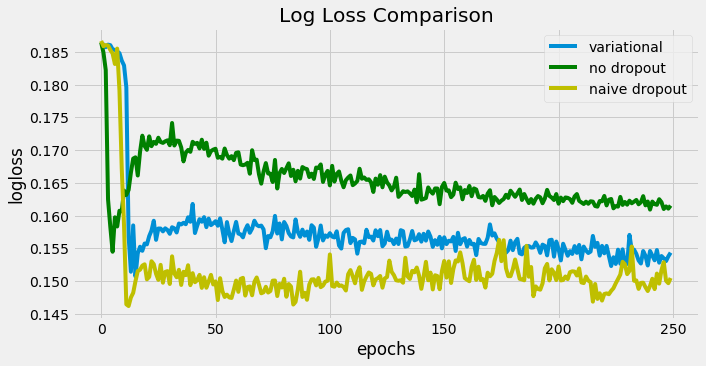

In [14]:
plt.title("Log Loss Comparison")
plt.plot(np.arange(len(modeltest_1.history)), [x[0] ** 0.5 for x in modeltest_1.history], label="variational")
plt.plot(np.arange(len(modeltest_2.history)), [x[0] ** 0.5 for x in modeltest_2.history], "g-", label="no dropout")
plt.plot(np.arange(len(modeltest_3.history)), [x[0] ** 0.5 for x in modeltest_3.history], "y-", label="naive dropout")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("logloss")